In [7]:

import tensorflow as tf
print(tf.__version__)



2.14.0


In [8]:
import sys
print(sys.executable)

/Users/chidam_sp/codify_odi/bin/python


In [9]:

physical_devices = tf.config.list_physical_devices('GPU')
print(physical_devices)


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [10]:

import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import gc
import csv
import tensorflow as tf
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import TimeSeriesSplit
import seaborn as sns
from tensorflow import keras


In [11]:

import platform 
print(platform. python_version())


3.9.6


In [13]:

zip_path = tf.keras.utils.get_file(
    origin='https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip',
    fname='jena_climate_2009_2016.csv.zip',
    extract=True)
jena_climate_csv_path, _ = os.path.splitext(zip_path)


In [14]:
jena_climate_csv_path

'/Users/chidam_sp/.keras/datasets/jena_climate_2009_2016.csv'

In [30]:
df = pd.read_csv(jena_climate_csv_path)

In [31]:
df.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3


In [32]:

df.isnull().sum()*100/len(df)


Date Time          0.0
p (mbar)           0.0
T (degC)           0.0
Tpot (K)           0.0
Tdew (degC)        0.0
rh (%)             0.0
VPmax (mbar)       0.0
VPact (mbar)       0.0
VPdef (mbar)       0.0
sh (g/kg)          0.0
H2OC (mmol/mol)    0.0
rho (g/m**3)       0.0
wv (m/s)           0.0
max. wv (m/s)      0.0
wd (deg)           0.0
dtype: float64

In [33]:

len(df)


420551

In [34]:

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')


In [35]:

date_time


0        2009-01-01 00:10:00
1        2009-01-01 00:20:00
2        2009-01-01 00:30:00
3        2009-01-01 00:40:00
4        2009-01-01 00:50:00
                 ...        
420546   2016-12-31 23:20:00
420547   2016-12-31 23:30:00
420548   2016-12-31 23:40:00
420549   2016-12-31 23:50:00
420550   2017-01-01 00:00:00
Name: Date Time, Length: 420551, dtype: datetime64[ns]

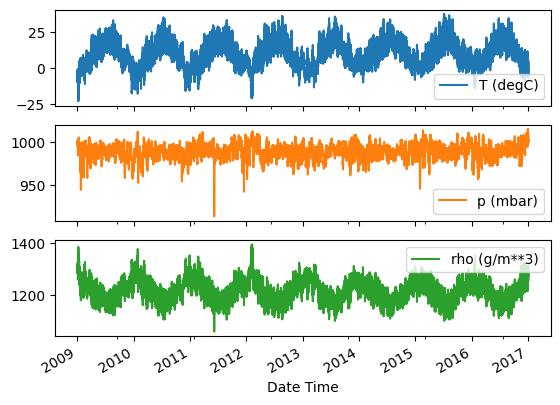

In [21]:

plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)


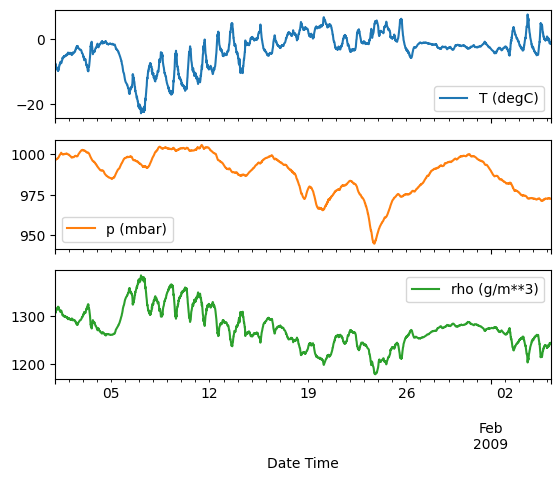

In [22]:

plot_features = df[plot_cols][:5080]
plot_features.index = date_time[:5080]
_ = plot_features.plot(subplots=True)


In [36]:

df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
p (mbar),420551.0,989.212776,8.358481,913.60,984.20,989.58,994.72,1015.35
T (degC),420551.0,9.450147,8.423365,-23.01,3.36,9.42,15.47,37.28
Tpot (K),420551.0,283.492743,8.504471,250.60,277.43,283.47,289.53,311.34
Tdew (degC),420551.0,4.955854,6.730674,-25.01,0.24,5.22,10.07,23.11
rh (%),420551.0,76.008259,16.476175,12.95,65.21,79.30,89.40,100.00
VPmax (mbar),420551.0,13.576251,7.739020,0.95,7.78,11.82,17.60,63.77
VPact (mbar),420551.0,9.533756,4.184164,0.79,6.21,8.86,12.35,28.32
VPdef (mbar),420551.0,4.042412,4.896851,0.00,0.87,2.19,5.30,46.01
sh (g/kg),420551.0,6.022408,2.656139,0.50,3.92,5.59,7.80,18.13
H2OC (mmol/mol),420551.0,9.640223,4.235395,0.80,6.29,8.96,12.49,28.82


In [37]:

# One thing that should stand out is the min value of the wind velocity (wv (m/s)) and 
# the maximum value (max. wv (m/s)) columns. This -9999 is likely erroneous.
# the velocity should be greater than zero (>=0). Replace it with zeros:

df['wv (m/s)'] = df['wv (m/s)'].replace(-9999.00, 0)
df['max. wv (m/s)'] = df['max. wv (m/s)'].replace(-9999.00, 0)


Text(0, 0.5, 'Wind Velocity [m/s]')

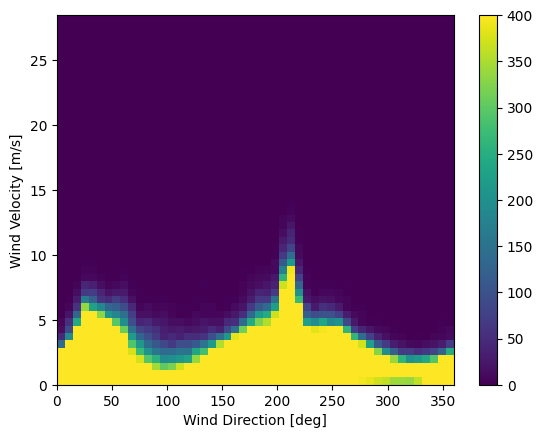

In [38]:

plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')


In [39]:

wv = df.pop('wv (m/s)')
max_wv = df.pop('max. wv (m/s)')

# Convert to radians.
wd_rad = df.pop('wd (deg)')*np.pi / 180

# Calculate the wind x and y components.
df['Wx'] = wv*np.cos(wd_rad)
df['Wy'] = wv*np.sin(wd_rad)

# Calculate the max wind x and y components.
df['max Wx'] = max_wv*np.cos(wd_rad)
df['max Wy'] = max_wv*np.sin(wd_rad)



In [40]:
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy
0,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,-0.911955,0.478787,-1.549439,0.813474
1,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,-0.518797,0.499249,-1.080827,1.040103
2,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,-0.187962,0.027756,-0.623242,0.092032
3,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,-0.323359,-0.105066,-0.475528,-0.154508
4,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,-0.264351,-0.180328,-0.520442,-0.355021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,-0.335000,-0.580237,-0.760000,-1.316359
420547,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,-0.665237,-0.925775,-1.120399,-1.559200
420548,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,-0.882516,-0.622547,-1.634290,-1.152865
420549,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,-1.038776,-1.068197,-1.505877,-1.548527


In [41]:

df.isnull().sum()*100/len(df)


p (mbar)           0.0
T (degC)           0.0
Tpot (K)           0.0
Tdew (degC)        0.0
rh (%)             0.0
VPmax (mbar)       0.0
VPact (mbar)       0.0
VPdef (mbar)       0.0
sh (g/kg)          0.0
H2OC (mmol/mol)    0.0
rho (g/m**3)       0.0
Wx                 0.0
Wy                 0.0
max Wx             0.0
max Wy             0.0
dtype: float64

(-12.185637751588763,
 27.064703747937347,
 -8.898421828413506,
 7.849152333233395)

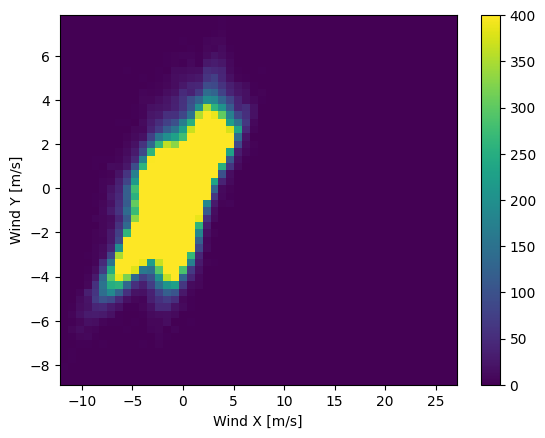

In [43]:

plt.hist2d(df['Wx'], df['Wy'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind X [m/s]')
plt.ylabel('Wind Y [m/s]')
ax = plt.gca()
ax.axis('tight')


In [44]:

timestamp_s = date_time.map(pd.Timestamp.timestamp)


In [45]:

day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))



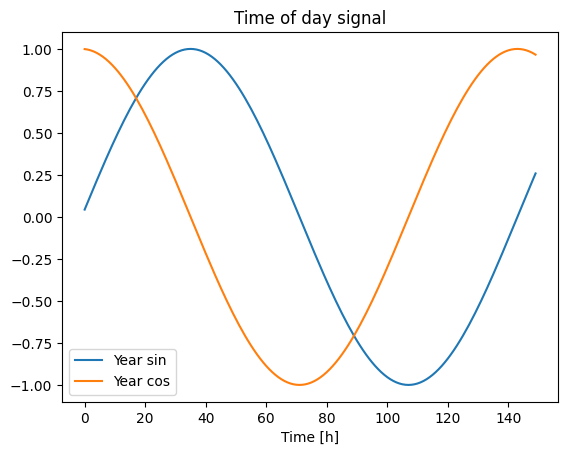

In [48]:

plt.plot(np.array(df['Day sin'])[:150], label='Year sin')
plt.plot(np.array(df['Day cos'])[:150], label='Year cos')
plt.xlabel('Time [h]')
plt.title('Time of day signal')
plt.legend(loc='lower left')



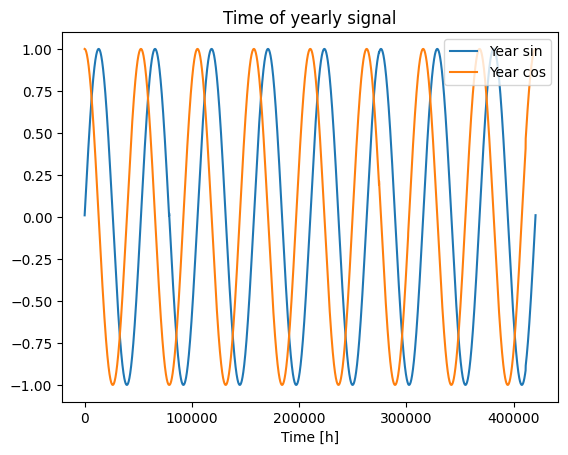

In [49]:

plt.plot(np.array(df['Year sin']), label='Year sin')
plt.plot(np.array(df['Year cos']), label='Year cos')
plt.xlabel('Time [h]')
plt.title('Time of yearly signal')
plt.legend(loc='upper right')


2024-03-25 11:55:50.074966: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-03-25 11:55:50.075012: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-25 11:55:50.075028: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-25 11:55:50.075240: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-25 11:55:50.075642: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


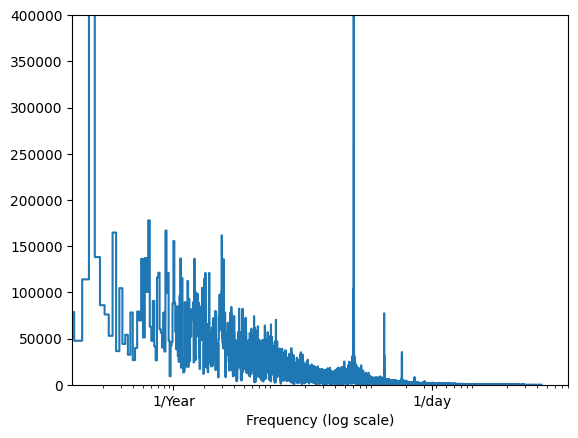

In [50]:

fft = tf.signal.rfft(df['T (degC)'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(df['T (degC)'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')


In [51]:

fft


<tf.Tensor: shape=(210276,), dtype=complex64, numpy=
array([ 3.9772438e+06-9.3645039e+00j, -2.8136783e+04+2.2477492e+05j,
       -1.6305011e+04+7.4300281e+04j, ..., -1.7765182e+01-1.5910972e+01j,
        2.1591228e+01-2.8820570e+01j,  2.4006577e+01+4.2902973e+01j],
      dtype=complex64)>

In [53]:

df.isnull().sum()*100/len(df)


p (mbar)           0.0
T (degC)           0.0
Tpot (K)           0.0
Tdew (degC)        0.0
rh (%)             0.0
VPmax (mbar)       0.0
VPact (mbar)       0.0
VPdef (mbar)       0.0
sh (g/kg)          0.0
H2OC (mmol/mol)    0.0
rho (g/m**3)       0.0
Wx                 0.0
Wy                 0.0
max Wx             0.0
max Wy             0.0
Day sin            0.0
Day cos            0.0
Year sin           0.0
Year cos           0.0
dtype: float64

In [54]:

#Let's save a copy of the processed dataframe

df.to_csv('/Users/chidam_sp/jena_climate_processed_df_ready_for_train_val_test_split.csv', index=False)



In [62]:
df.shape

(420551, 19)

In [72]:

df.head()


,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,-0.911955,0.478787,-1.549439,0.813474,0.043619,0.999048,0.009452,0.999955
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,-0.518797,0.499249,-1.080827,1.040103,0.087156,0.996195,0.009571,0.999954
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,-0.187962,0.027756,-0.623242,0.092032,0.130526,0.991445,0.009691,0.999953
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,-0.323359,-0.105066,-0.475528,-0.154508,0.173648,0.984808,0.009810,0.999952
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,-0.264351,-0.180328,-0.520442,-0.355021,0.216440,0.976296,0.009930,0.999951


In [19]:

def split_data(df):
    column_indices = {name: i for i, name in enumerate(df.columns)}
    n = len(df)
    train_df = df[0:int(n*0.7)]
    val_df = df[int(n*0.7):int(n*0.9)]
    test_df = df[int(n*0.9):]
    num_features = df.shape[1]
    
    return train_df, val_df, test_df, num_features
    


In [21]:

# train_df, val_df, test_df, num_features = split_data(df_processed)


In [74]:

train_df, val_df, test_df, num_features = split_data(df)


In [76]:
train_df.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),Wx,Wy,max Wx,max Wy,Day sin,Day cos,Year sin,Year cos
0,996.52,-8.02,265.40,-8.90,93.3,3.33,3.11,0.22,1.94,3.12,1307.75,-0.911955,0.478787,-1.549439,0.813474,0.043619,0.999048,0.009452,0.999955
1,996.57,-8.41,265.01,-9.28,93.4,3.23,3.02,0.21,1.89,3.03,1309.80,-0.518797,0.499249,-1.080827,1.040103,0.087156,0.996195,0.009571,0.999954
2,996.53,-8.51,264.91,-9.31,93.9,3.21,3.01,0.20,1.88,3.02,1310.24,-0.187962,0.027756,-0.623242,0.092032,0.130526,0.991445,0.009691,0.999953
3,996.51,-8.31,265.12,-9.07,94.2,3.26,3.07,0.19,1.92,3.08,1309.19,-0.323359,-0.105066,-0.475528,-0.154508,0.173648,0.984808,0.009810,0.999952
4,996.51,-8.27,265.15,-9.04,94.1,3.27,3.08,0.19,1.92,3.09,1309.00,-0.264351,-0.180328,-0.520442,-0.355021,0.216440,0.976296,0.009930,0.999951


In [22]:

num_features


19

In [23]:

def convert_numpy(x):
    return x.to_numpy()


def normalize_and_numpy(train_df, val_df, test_df, label_column):
    train_mean = train_df.mean()
    train_std = train_df.std()
    train_df = (train_df - train_mean) / train_std
    val_df = (val_df - train_mean) / train_std
    test_df = (test_df - train_mean) / train_std
    train_y = train_df.pop(label_column)
    val_y = val_df.pop(label_column)
    test_y = test_df.pop(label_column)
    train_features = convert_numpy(train_df)
    train_labels = convert_numpy(train_y)
    val_features = convert_numpy(val_df)
    val_labels = convert_numpy(val_y)
    test_features = convert_numpy(test_df)
    test_labels = convert_numpy(test_y)
    return train_features, train_labels, val_features, val_labels, test_features, test_labels
    


In [24]:


train_features, train_labels, val_features, val_labels, test_features, test_labels = normalize_and_numpy(train_df, val_df, test_df, 'T (degC)')
                                                                                                         
                                                                                                         

In [85]:

# df_std = (df - train_mean) / train_std
# df_std = df_std.melt(var_name='Column', value_name='Normalized')
# plt.figure(figsize=(12, 6))
# ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
# _ = ax.set_xticklabels(df.keys(), rotation=90)


In [86]:
train_features

array([[ 0.94779765, -2.03966383, -1.93591114, ...,  1.412881  ,
        -0.06189205,  1.42845036],
       [ 0.95382407, -2.08436733, -1.99040874, ...,  1.40884565,
        -0.06172154,  1.42844876],
       [ 0.94900294, -2.09582976, -1.99471118, ...,  1.4021286 ,
        -0.06155104,  1.42844715],
       ...,
       [ 0.22462833,  0.58752597,  1.30813045, ...,  1.22476489,
        -0.85916236, -1.15194156],
       [ 0.21378079,  0.59784216,  1.32103778, ...,  1.19275676,
        -0.85930486, -1.15184933],
       [ 0.20413853,  0.58294099,  1.29522312, ...,  1.15847826,
        -0.85944735, -1.1517571 ]])

In [87]:
train_labels

array([-1.97909842, -2.02416303, -2.03571805, ...,  0.60922766,
        0.61847168,  0.60229464])

In [88]:

val_features


array([[ 0.20895966,  0.5565774 ,  1.26797432, ...,  1.12199466,
        -0.85958983, -1.15166484],
       [ 0.21137023,  0.54167623,  1.25650114, ...,  1.08337539,
        -0.85973229, -1.15157257],
       [ 0.22101249,  0.51645888,  1.22925234, ...,  1.04269398,
        -0.85987475, -1.15148028],
       ...,
       [ 1.61672928, -0.844132  , -0.48311975, ...,  0.75989263,
         1.26303389,  0.51119068],
       [ 1.62516625, -0.84183951, -0.48885634, ...,  0.81119402,
         1.26309312,  0.51103321],
       [ 1.63119266, -0.84757073, -0.52757832, ...,  0.86095138,
         1.26315233,  0.51087573]])

In [89]:

val_labels


array([ 0.57687358,  0.56185205,  0.53643099, ..., -0.72422247,
       -0.72191147, -0.72768898])

In [90]:
test_features, test_labels

(array([[ 1.64083492, -0.84986322, -0.55912956, ...,  0.90906999,
          1.26321152,  0.51071825],
        [ 1.6492719 , -0.84986322, -0.56056371, ...,  0.95545825,
          1.26327069,  0.51056075],
        [ 1.65409303, -0.85674068, -0.563432  , ...,  1.00002786,
          1.26332985,  0.51040325],
        ...,
        [ 1.34554078, -1.51124564, -1.83695496, ...,  1.40884565,
         -0.0609304 ,  1.42844109],
        [ 1.3443355 , -1.63389368, -1.88284768, ...,  1.412881  ,
         -0.06075989,  1.42843938],
        [ 1.34554078, -1.7003758 , -1.86707206, ...,  1.41422697,
         -0.06058939,  1.42843765]]),
 array([-0.72884448, -0.72884448, -0.734622  , ..., -1.4175241 ,
        -1.54116289, -1.60933755]))

In [73]:

test_labels.shape


(42056,)

In [74]:

test_features.shape


(42056, 18)

In [91]:
train_features.shape

(294385, 18)

In [78]:

for k, v in test:
    print(k.shape)
    print(v.shape)
    break;


(256, 120, 18)
(256,)


In [25]:


def create_batch(df_features, df_labels, sampling_rate, sequence_length, delay, batch_size):
    df = keras.utils.timeseries_dataset_from_array(df_features[:-delay], df_labels[delay:], sampling_rate=sampling_rate, 
                                                   sequence_length=sequence_length, shuffle=True, batch_size=batch_size)
    return df
    
    


In [101]:

sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256
# train = create_batch(train_features, train_labels, sampling_rate, sequence_length, delay, batch_size)
val = create_batch(val_features, val_labels, sampling_rate, sequence_length, delay, batch_size)
test = create_batch(test_features, test_labels, sampling_rate, sequence_length, delay, batch_size)


In [145]:
sampling_rate = 6
sequence_length = 120
delay = sampling_rate * (sequence_length + 24 - 1)
batch_size = 256
train = create_batch(train_features, train_labels, sampling_rate, sequence_length, delay, batch_size)


In [146]:

train



<_BatchDataset element_spec=(TensorSpec(shape=(None, None, 18), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [104]:

for features, labels in val:
    print("samples shape:", features.shape)
    print("targets shape:", labels.shape)
    break
    


samples shape: (256, 120, 18)
targets shape: (256,)


In [324]:

def model_build():
    tf.random.set_seed(129)
    np.random.seed(129)

    model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-5, momentum=0.9),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
 
    return model

    


Look I have run cross-validation loop say 10 or 20 times with different set of hyperparameter values. How is this different compared to creating a CV loop to find the best hyperparameters?


In [325]:

def cv_loop(train_series, val_series, patience):

    model = model_build()  # Function to create your model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=patience,
                                                mode='min')
    model_checkpoint = tf.keras.callbacks.ModelCheckpoint("/Users/chidam_sp/jena_climate_model/jena_stacked_standard_LSTM.h5", monitor='val_loss', mode='min', save_best_only=True)
                       
    history = model.fit(train_series, epochs=15, callbacks=[early_stopping, model_checkpoint], validation_data=val_series, verbose=1) 
    return history


In [326]:

history = cv_loop(train, val, 5)




Epoch 1/15
1144/1144 [==============================] - 57s 48ms/step - loss: 0.5735 - mean_absolute_error: 0.5923 - val_loss: 0.3361 - val_mean_absolute_error: 0.4478
Epoch 2/15
1144/1144 [==============================] - 54s 47ms/step - loss: 0.3607 - mean_absolute_error: 0.4645 - val_loss: 0.2589 - val_mean_absolute_error: 0.3893
Epoch 3/15
1144/1144 [==============================] - 56s 49ms/step - loss: 0.2957 - mean_absolute_error: 0.4231 - val_loss: 0.2374 - val_mean_absolute_error: 0.3743
Epoch 4/15
1144/1144 [==============================] - 54s 47ms/step - loss: 0.2698 - mean_absolute_error: 0.4066 - val_loss: 0.2279 - val_mean_absolute_error: 0.3685
Epoch 5/15
1144/1144 [==============================] - 53s 46ms/step - loss: 0.2543 - mean_absolute_error: 0.3956 - val_loss: 0.2203 - val_mean_absolute_error: 0.3629
Epoch 6/15
1144/1144 [==============================] - 54s 47ms/step - loss: 0.2419 - mean_absolute_error: 0.3861 - val_loss: 0.2130 - val_mean_absolute_error:

In [323]:

del history, model_build, cv_loop


NameError: name 'history' is not defined

In [111]:

def plot_learning_curve_metric(history, lower_limit, upper_limit):
    plt.plot(history.history['mean_absolute_error'], label='training_mae')
    plt.plot(history.history['val_mean_absolute_error'], label='validation_mae')
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.ylim([lower_limit, upper_limit])
    plt.legend(loc='upper right')

def plot_learning_curve_loss(history, lower_limit, upper_limit):
    plt.plot(history.history['loss'], label='training_loss')
    plt.plot(history.history['val_loss'], label='validation_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([lower_limit, upper_limit])
    plt.legend(loc='upper right')
    plt.show()




## With the following setup

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])



In [112]:

history.history


{'loss': [0.12393873184919357,
  0.09865702688694,
  0.08941037207841873,
  0.08376659452915192,
  0.07928247004747391,
  0.07610513269901276],
 'mean_absolute_error': [0.2724567651748657,
  0.24559363722801208,
  0.2334926575422287,
  0.2260095626115799,
  0.21993659436702728,
  0.215684711933136],
 'val_loss': [0.1245429515838623,
  0.13410191237926483,
  0.14199170470237732,
  0.14813482761383057,
  0.1530049592256546,
  0.1576799750328064],
 'val_mean_absolute_error': [0.2767455279827118,
  0.28816232085227966,
  0.29724910855293274,
  0.3034566342830658,
  0.30821987986564636,
  0.31303688883781433]}

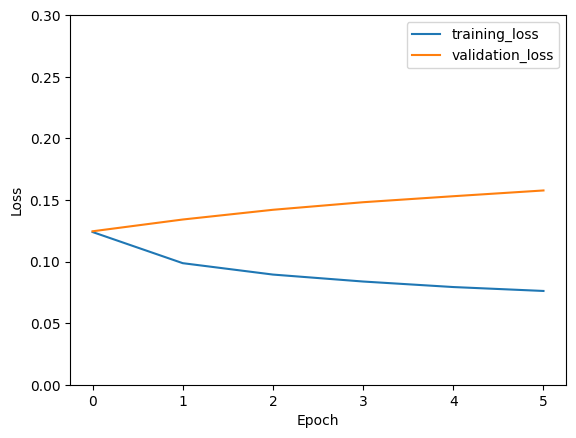

In [114]:

plot_learning_curve_loss(history, 0, 0.3)


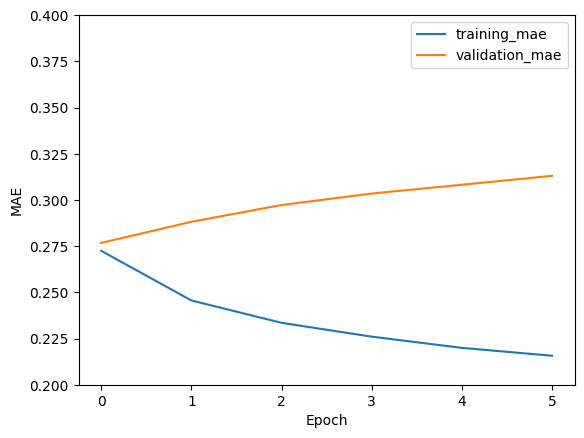

In [115]:

plot_learning_curve_metric(history, 0.2, 0.4)



## With the following setup

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      tf.keras.layers.LSTM(64),
      # tf.keras.layers.LSTM(64, return_sequences=True),
      # tf.keras.layers.LSTM(8),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.Adam(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])



In [124]:

history.history


{'loss': [0.10440816730260849,
  0.05464613810181618,
  0.032711442559957504,
  0.02592337504029274,
  0.01970258727669716,
  0.01902446150779724],
 'mean_absolute_error': [0.24979503452777863,
  0.1813049167394638,
  0.14027664065361023,
  0.12431322038173676,
  0.10850417613983154,
  0.1056244820356369],
 'val_loss': [0.14795848727226257,
  0.1721258908510208,
  0.19384042918682098,
  0.19737820327281952,
  0.1973002701997757,
  0.20304378867149353],
 'val_mean_absolute_error': [0.3048107624053955,
  0.3291167914867401,
  0.34878823161125183,
  0.35144880414009094,
  0.3525480031967163,
  0.35691842436790466]}

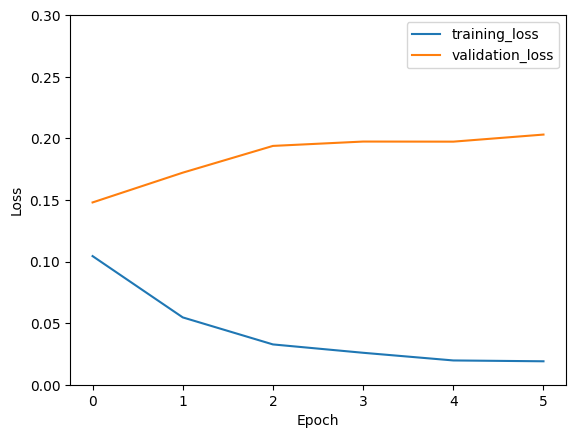

In [125]:

plot_learning_curve_loss(history, 0, 0.3)


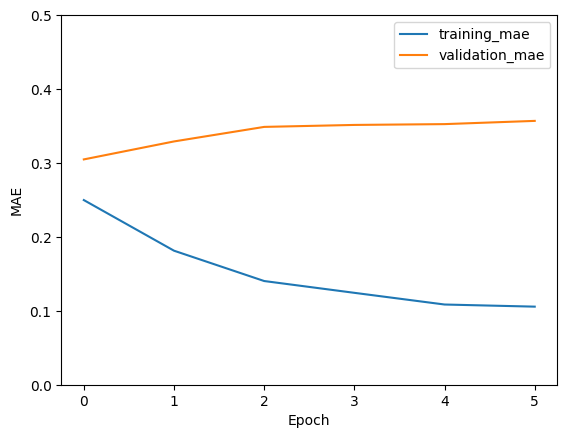

In [128]:

plot_learning_curve_metric(history, 0, 0.5)



## With the following setup

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      # tf.keras.layers.LSTM(64),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])


In [133]:

history.history


{'loss': [0.14536935091018677,
  0.12073899060487747,
  0.11699462682008743,
  0.1149817705154419,
  0.11360228806734085,
  0.1125219538807869,
  0.11161667853593826,
  0.11085028201341629,
  0.11018101871013641,
  0.10956467688083649],
 'mean_absolute_error': [0.2967458963394165,
  0.27246353030204773,
  0.2680724859237671,
  0.265713632106781,
  0.26406925916671753,
  0.26278024911880493,
  0.2616942822933197,
  0.2607743740081787,
  0.2599639594554901,
  0.2592112421989441],
 'val_loss': [0.13281938433647156,
  0.12787967920303345,
  0.12601765990257263,
  0.12491454184055328,
  0.12469808012247086,
  0.12430478632450104,
  0.12426569312810898,
  0.1239161267876625,
  0.12368910759687424,
  0.12373562902212143],
 'val_mean_absolute_error': [0.28716936707496643,
  0.28146928548812866,
  0.2789987623691559,
  0.2773377001285553,
  0.27689072489738464,
  0.2761777639389038,
  0.2759690284729004,
  0.27537304162979126,
  0.2749309241771698,
  0.2749277651309967]}

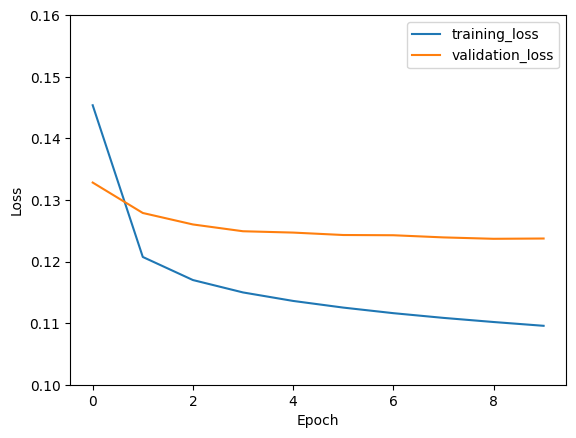

In [136]:

plot_learning_curve_loss(history, 0.10, 0.16)


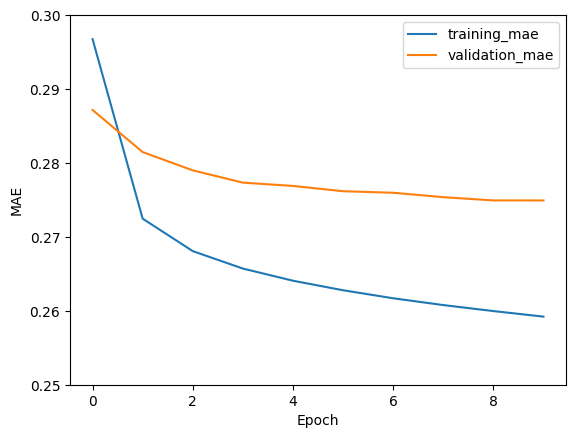

In [139]:

plot_learning_curve_metric(history, 0.250, 0.3)


In [ ]:

 model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      # tf.keras.layers.LSTM(64),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.RMSprop(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
 


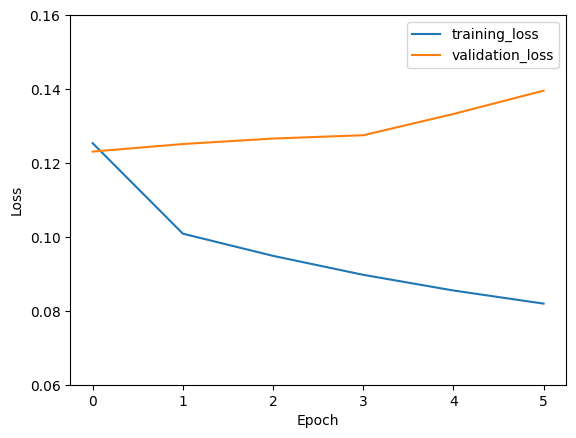

In [146]:

plot_learning_curve_loss(history, 0.06, 0.16)


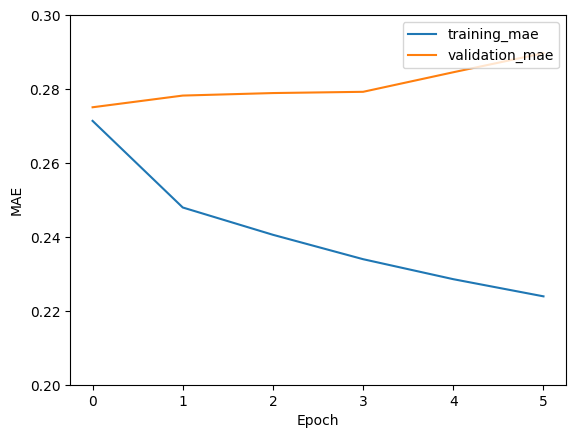

In [149]:

plot_learning_curve_metric(history, 0.2, 0.3)



## With the following setup

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.RMSprop(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])



In [157]:

history.history


{'loss': [0.0955609381198883,
  0.04902918264269829,
  0.029235001653432846,
  0.021303368732333183,
  0.017098980024456978,
  0.014470542781054974],
 'mean_absolute_error': [0.23953929543495178,
  0.17099693417549133,
  0.1321793496608734,
  0.11274681985378265,
  0.10065920650959015,
  0.09231973439455032],
 'val_loss': [0.16025905311107635,
  0.1859041154384613,
  0.1958632618188858,
  0.19884784519672394,
  0.18954148888587952,
  0.18857763707637787],
 'val_mean_absolute_error': [0.31642699241638184,
  0.3396657407283783,
  0.3489513099193573,
  0.3522127568721771,
  0.3447369635105133,
  0.34364205598831177]}

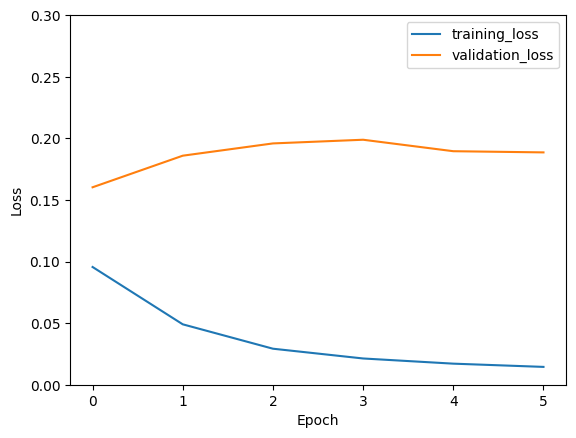

In [160]:

plot_learning_curve_loss(history, 0, 0.30)


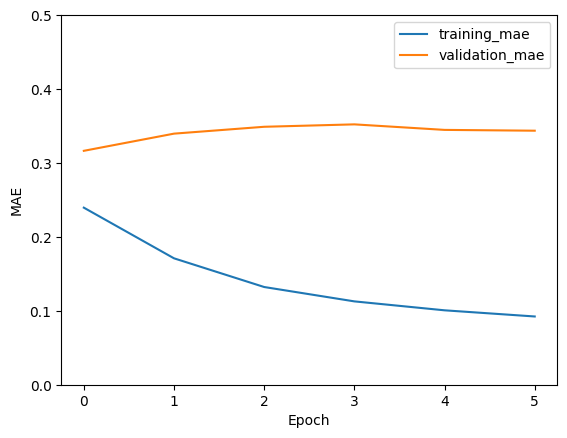

In [163]:

plot_learning_curve_metric(history, 0, 0.50)



## With the following setup

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])


In [168]:

history.history


{'loss': [0.1506538987159729,
  0.1209941878914833,
  0.11539711058139801,
  0.1116139367222786,
  0.10850653797388077,
  0.10585004836320877,
  0.10335516184568405,
  0.10098131746053696,
  0.09877951443195343,
  0.09657470136880875],
 'mean_absolute_error': [0.300931453704834,
  0.27226635813713074,
  0.26577067375183105,
  0.2612234950065613,
  0.2574797570705414,
  0.25426265597343445,
  0.25127336382865906,
  0.2483331710100174,
  0.24570178985595703,
  0.24294555187225342],
 'val_loss': [0.13621923327445984,
  0.1308078169822693,
  0.12907297909259796,
  0.12673157453536987,
  0.12730970978736877,
  0.1251066029071808,
  0.12525330483913422,
  0.12546873092651367,
  0.12650422751903534,
  0.12486908584833145],
 'val_mean_absolute_error': [0.2884381115436554,
  0.28293943405151367,
  0.2817811369895935,
  0.27949944138526917,
  0.2801404297351837,
  0.27710074186325073,
  0.27789127826690674,
  0.278683602809906,
  0.280000776052475,
  0.2776939272880554]}

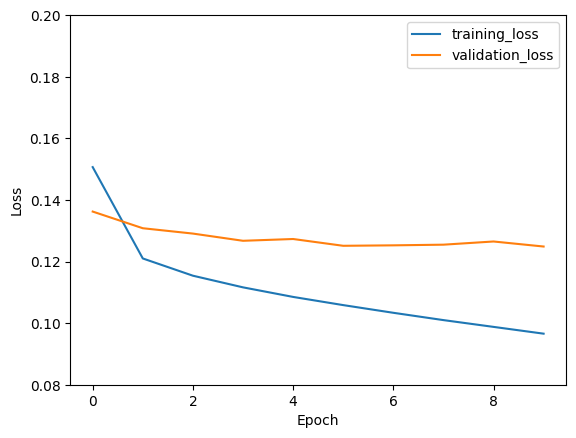

In [171]:

plot_learning_curve_loss(history, 0.08, 0.20)


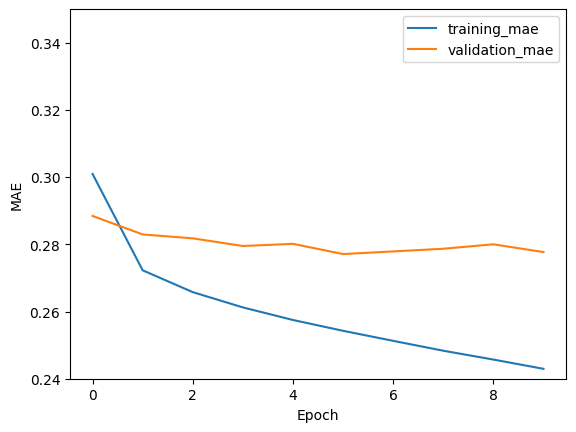

In [174]:

plot_learning_curve_metric(history, 0.24, 0.35)



## With the following setup

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-3, momentum=0.3),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
 


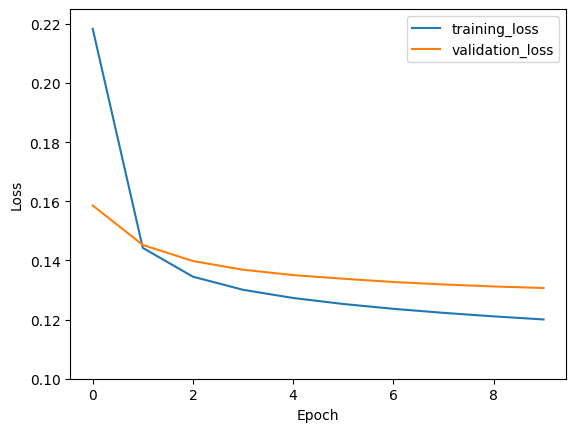

In [182]:

plot_learning_curve_loss(history, 0.10, 0.225)


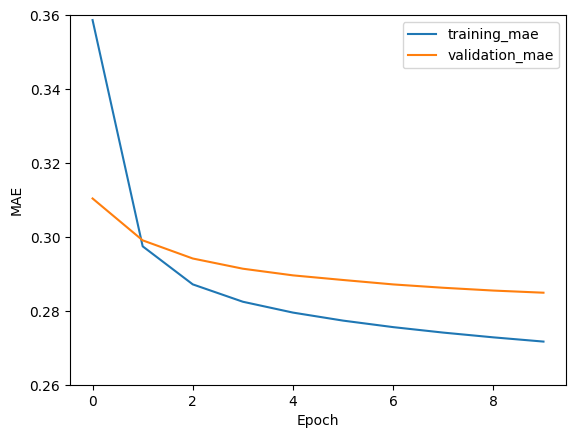

In [185]:


plot_learning_curve_metric(history, 0.26, 0.36)



## With the following setup

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-5, momentum=0.3),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])


In [199]:

history.history


{'loss': [1.0393131971359253,
  0.7760393023490906,
  0.624062180519104,
  0.5310863256454468,
  0.4714406132698059,
  0.4314807057380676,
  0.4035530090332031,
  0.3831959664821625,
  0.3677281439304352,
  0.35549497604370117],
 'mean_absolute_error': [0.8266515731811523,
  0.6996080875396729,
  0.6188962459564209,
  0.567369818687439,
  0.5337879657745361,
  0.5111913681030273,
  0.49543213844299316,
  0.48393678665161133,
  0.4750727117061615,
  0.46790000796318054],
 'val_loss': [0.6965766549110413,
  0.5316023826599121,
  0.4372824728488922,
  0.3809806704521179,
  0.34619346261024475,
  0.3239368796348572,
  0.3091318905353546,
  0.29882311820983887,
  0.29125720262527466,
  0.2853763997554779],
 'val_mean_absolute_error': [0.6750792860984802,
  0.5792626738548279,
  0.5207250714302063,
  0.48419398069381714,
  0.4609338939189911,
  0.44580078125,
  0.4356648027896881,
  0.4286370873451233,
  0.423484206199646,
  0.4194182753562927]}

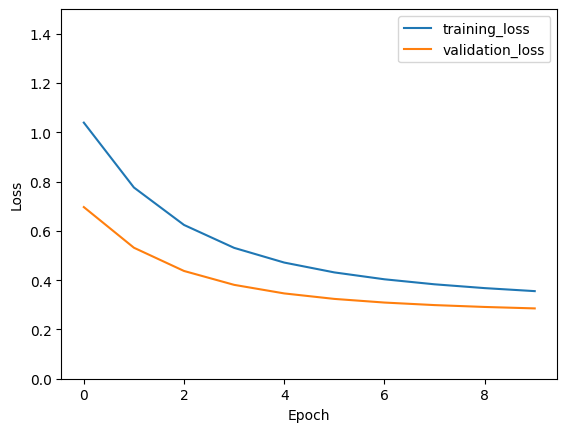

In [201]:

plot_learning_curve_loss(history, 0, 1.5)


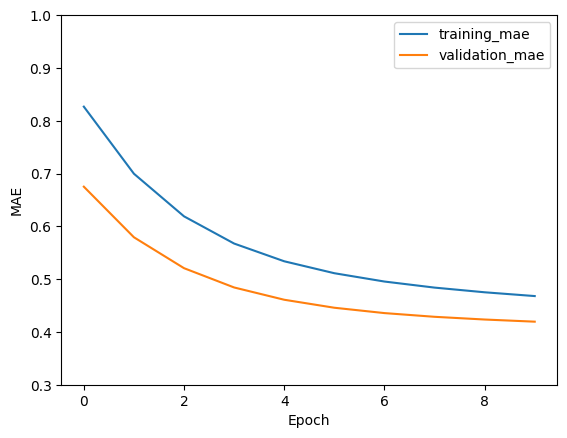

In [204]:

plot_learning_curve_metric(history, 0.3, 1)



## With the following setup

 model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-5, momentum=0.6),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])


In [210]:

history.history


{'loss': [0.6309280395507812,
  0.4322235584259033,
  0.35553932189941406,
  0.3195478022098541,
  0.2990010678768158,
  0.28502634167671204,
  0.27421805262565613,
  0.265173077583313,
  0.25726228952407837,
  0.2501780390739441],
 'mean_absolute_error': [0.6141899228096008,
  0.5003724694252014,
  0.4554527997970581,
  0.4341905117034912,
  0.4216335415840149,
  0.4126240015029907,
  0.40523380041122437,
  0.3987358808517456,
  0.39280298352241516,
  0.3873184025287628],
 'val_loss': [0.35501226782798767,
  0.2819480895996094,
  0.25627362728118896,
  0.24507513642311096,
  0.23835617303848267,
  0.2329782247543335,
  0.22800418734550476,
  0.22320161759853363,
  0.21855780482292175,
  0.214108407497406],
 'val_mean_absolute_error': [0.4603961706161499,
  0.40924006700515747,
  0.3921099603176117,
  0.3855946958065033,
  0.38145002722740173,
  0.3776956796646118,
  0.37388521432876587,
  0.37000563740730286,
  0.3661729097366333,
  0.36244985461235046]}

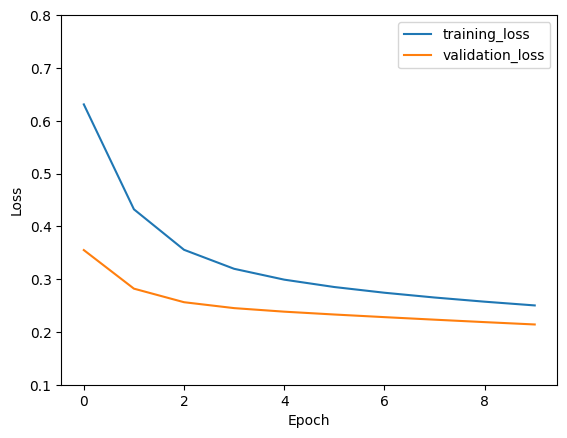

In [214]:

plot_learning_curve_loss(history, 0.1, 0.8)


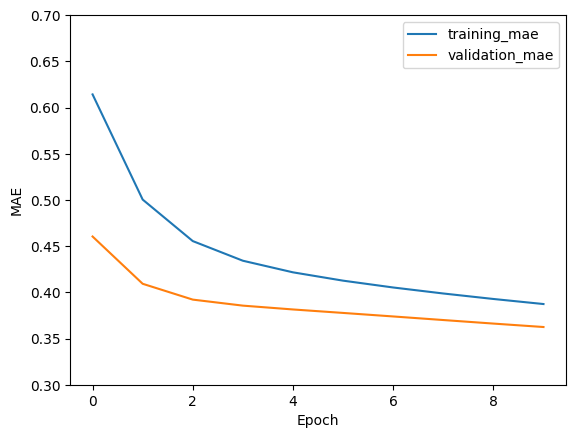

In [216]:

plot_learning_curve_metric(history, 0.3, 0.7)



## With the following setup
model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      # tf.keras.layers.LSTM(64, return_sequences=True),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-5, momentum=0.6),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
 


In [229]:

history.history


{'loss': [0.6698699593544006,
  0.41627955436706543,
  0.3063644468784332,
  0.25810548663139343,
  0.23523129522800446,
  0.22278141975402832,
  0.21486513316631317,
  0.20910897850990295,
  0.204501673579216,
  0.20058274269104004],
 'mean_absolute_error': [0.638563871383667,
  0.4911656081676483,
  0.41932010650634766,
  0.38649654388427734,
  0.3713075518608093,
  0.3632708191871643,
  0.35813066363334656,
  0.35425999760627747,
  0.3509999215602875,
  0.34808263182640076],
 'val_loss': [0.36702558398246765,
  0.2586729824542999,
  0.21974797546863556,
  0.20582248270511627,
  0.2000235915184021,
  0.19665250182151794,
  0.19393332302570343,
  0.19137011468410492,
  0.1888635754585266,
  0.1864369809627533],
 'val_mean_absolute_error': [0.4776463210582733,
  0.38889145851135254,
  0.354390949010849,
  0.34334930777549744,
  0.3400571346282959,
  0.3385429382324219,
  0.3372992277145386,
  0.33586183190345764,
  0.33421748876571655,
  0.3324601948261261]}

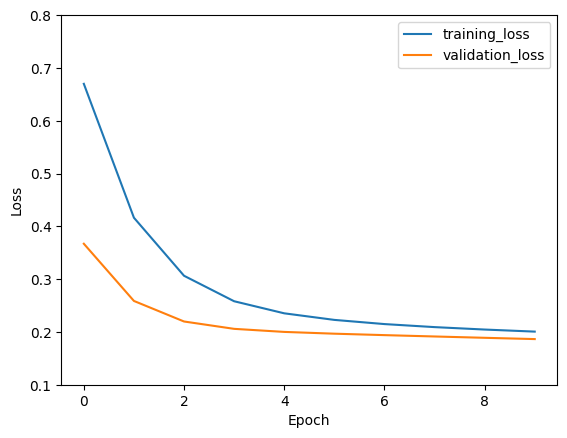

In [230]:

plot_learning_curve_loss(history, 0.1, 0.8)


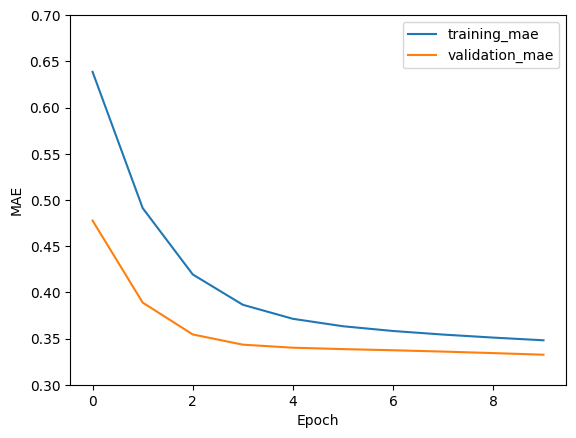

In [234]:

plot_learning_curve_metric(history, 0.3, 0.7)


In [ ]:

With the following setup

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
        
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-5, momentum=0.6),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])


In [239]:

history.history


{'loss': [1.0176057815551758,
  0.6729032397270203,
  0.5037592649459839,
  0.4150751829147339,
  0.36461517214775085,
  0.3341163694858551,
  0.3145108222961426,
  0.30101367831230164,
  0.2910274863243103,
  0.2831187844276428],
 'mean_absolute_error': [0.8209177255630493,
  0.6544244885444641,
  0.5574670433998108,
  0.5019073486328125,
  0.46905747056007385,
  0.4488905370235443,
  0.4359224736690521,
  0.4270297884941101,
  0.42041534185409546,
  0.41513633728027344],
 'val_loss': [0.6450116038322449,
  0.4523649215698242,
  0.3588937819004059,
  0.3096850514411926,
  0.2824350595474243,
  0.26657769083976746,
  0.2567092776298523,
  0.24999307096004486,
  0.24493199586868286,
  0.24073660373687744],
 'val_mean_absolute_error': [0.6504318714141846,
  0.5323365926742554,
  0.467558354139328,
  0.4313569962978363,
  0.41085419058799744,
  0.3991049826145172,
  0.3918851613998413,
  0.3870210349559784,
  0.38340726494789124,
  0.3804173767566681]}

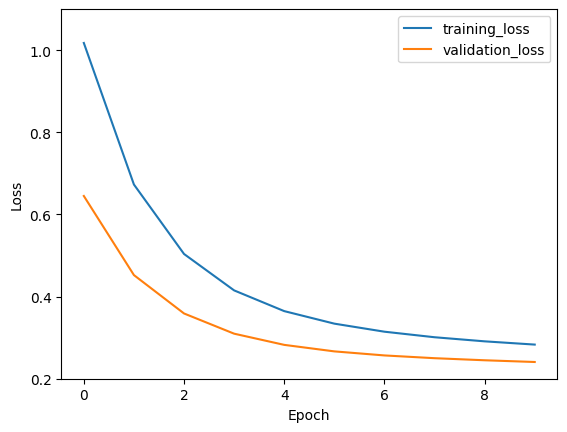

In [244]:
plot_learning_curve_loss(history, 0.2, 1.1)

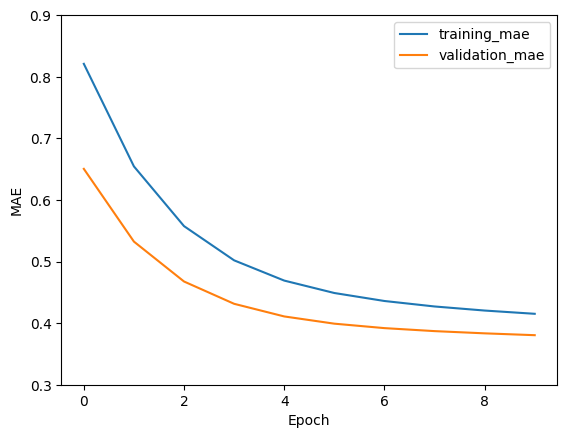

In [246]:
plot_learning_curve_metric(history, 0.3, 0.9)

In [ ]:

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      # tf.keras.layers.Conv1D(filters=32, kernel_size=5,
      #                 strides=1, padding="causal",
      #                 activation="relu",
      #                 input_shape=[None, 1]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-5, momentum=0.6),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
 


In [254]:

history.history


{'loss': [0.8074619174003601,
  0.5532457232475281,
  0.42827409505844116,
  0.36189723014831543,
  0.323549747467041,
  0.29962852597236633,
  0.2836100161075592,
  0.27214428782463074,
  0.26341357827186584,
  0.25638899207115173,
  0.2504712641239166,
  0.2453020066022873,
  0.2406618595123291,
  0.2364138960838318,
  0.2324705719947815,
  0.2287742644548416,
  0.2252870798110962,
  0.2219809740781784,
  0.21883702278137207,
  0.21584059298038483,
  0.21297955513000488,
  0.21024483442306519,
  0.20762841403484344,
  0.20512327551841736,
  0.20272326469421387,
  0.20042294263839722,
  0.19821688532829285,
  0.19610081613063812,
  0.19407019019126892,
  0.19212110340595245],
 'mean_absolute_error': [0.7202277779579163,
  0.5828323364257812,
  0.5062389373779297,
  0.46306008100509644,
  0.43775486946105957,
  0.42198696732521057,
  0.41148751974105835,
  0.4039415717124939,
  0.3981131911277771,
  0.3933190107345581,
  0.38916152715682983,
  0.38543272018432617,
  0.38199856877326965

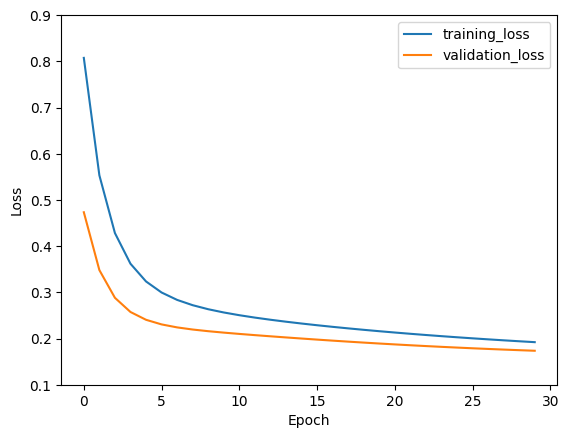

In [256]:

plot_learning_curve_loss(history, 0.1, 0.9)


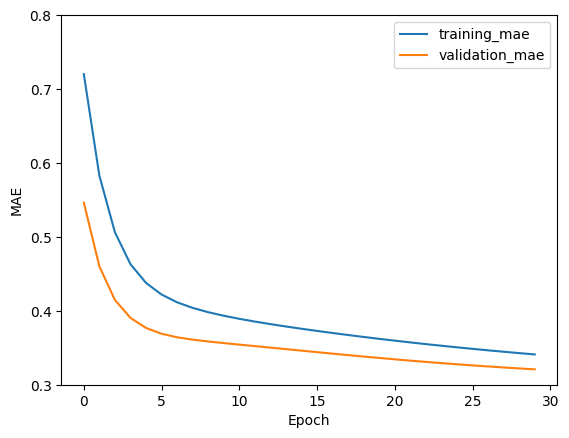

In [258]:

plot_learning_curve_metric(history, 0.3, 0.8)


In [ ]:

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-5, momentum=0.9),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    model = model_build()  # Function to create your model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=patience,
                                                mode='min')
    history = model.fit(train_series, epochs=30, callbacks=[early_stopping], validation_data=val_series, verbose=1) 


In [263]:

history.history


{'loss': [0.6537819504737854,
  0.3794136643409729,
  0.2969207465648651,
  0.2675934433937073,
  0.2507169544696808,
  0.23736672103405,
  0.22571663558483124,
  0.21531061828136444,
  0.20597176253795624,
  0.19759050011634827,
  0.19008731842041016,
  0.1833980679512024,
  0.17746207118034363,
  0.17221565544605255,
  0.1675962209701538,
  0.16354124248027802,
  0.15998780727386475,
  0.15687844157218933,
  0.15415918827056885,
  0.15177813172340393,
  0.14968881011009216,
  0.14785048365592957,
  0.14622870087623596,
  0.14479051530361176,
  0.14351113140583038,
  0.14236663281917572,
  0.1413383036851883,
  0.14040936529636383,
  0.1395660638809204,
  0.13879592716693878],
 'mean_absolute_error': [0.6398657560348511,
  0.4775334298610687,
  0.42365390062332153,
  0.4041508734226227,
  0.39197495579719543,
  0.3815874755382538,
  0.3720965087413788,
  0.36333492398262024,
  0.35527122020721436,
  0.3478628396987915,
  0.3411180078983307,
  0.33501848578453064,
  0.32952821254730225

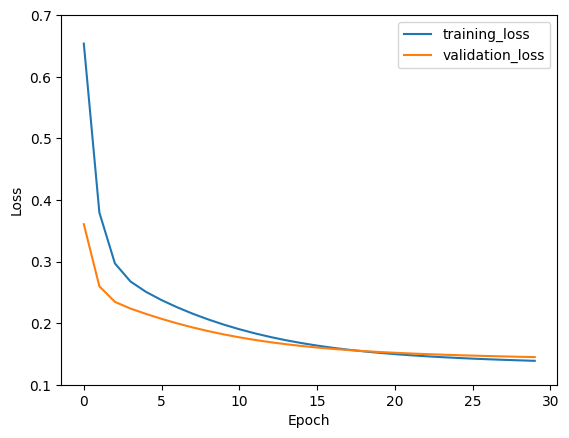

In [265]:

plot_learning_curve_loss(history, 0.1, 0.7)


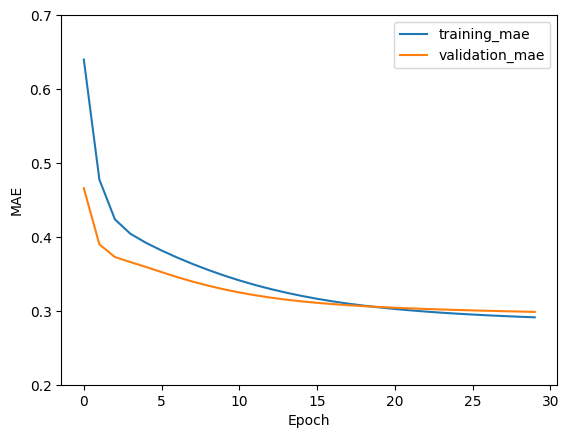

In [268]:

plot_learning_curve_metric(history, 0.2, 0.7)


In [ ]:

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      # tf.keras.layers.Conv1D(filters=32, kernel_size=5,
      #                 strides=1, padding="causal",
      #                 activation="relu",
      #                 input_shape=[None, 1]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-5, momentum=0.9),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    model = model_build()  # Function to create your model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=patience,
                                                mode='min')
    history = model.fit(train_series, epochs=10, callbacks=[early_stopping], validation_data=val_series, verbose=1) 


In [273]:

history.history


{'loss': [0.46925705671310425,
  0.28133270144462585,
  0.2500659227371216,
  0.2283724546432495,
  0.211089625954628,
  0.19735172390937805,
  0.18650197982788086,
  0.1779356747865677,
  0.17114244401454926,
  0.16571341454982758],
 'mean_absolute_error': [0.5227739214897156,
  0.41198739409446716,
  0.3900434076786041,
  0.3723263442516327,
  0.3572656810283661,
  0.34492361545562744,
  0.3349429965019226,
  0.32697421312332153,
  0.3205927908420563,
  0.3154652416706085],
 'val_loss': [0.2465781569480896,
  0.22222474217414856,
  0.20578722655773163,
  0.1922425776720047,
  0.1820722222328186,
  0.17471382021903992,
  0.16937237977981567,
  0.1654525250196457,
  0.16249649226665497,
  0.16018547117710114],
 'val_mean_absolute_error': [0.37858590483665466,
  0.3622679114341736,
  0.3490954637527466,
  0.3369015157222748,
  0.32725512981414795,
  0.32024529576301575,
  0.3152221441268921,
  0.31170201301574707,
  0.3092394173145294,
  0.3074476718902588]}

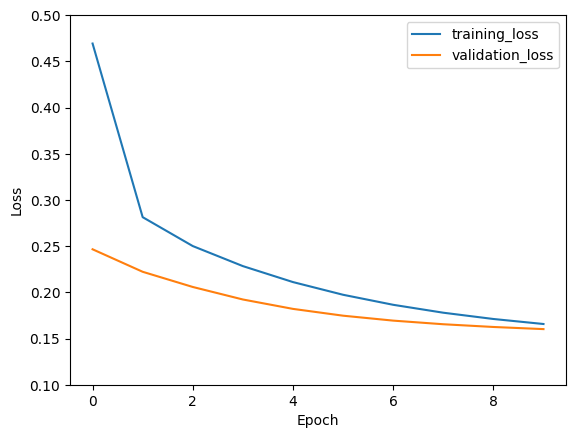

In [275]:

plot_learning_curve_loss(history, 0.1, 0.5)


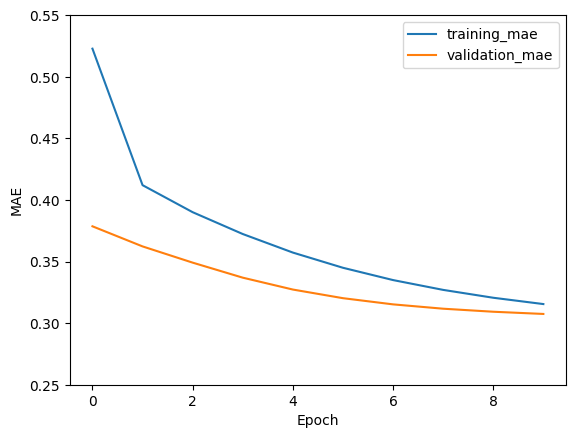

In [278]:

plot_learning_curve_metric(history, 0.25, 0.55)


In [ ]:

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      # tf.keras.layers.Conv1D(filters=32, kernel_size=5,
      #                 strides=1, padding="causal",
      #                 activation="relu",
      #                 input_shape=[None, 1]),
      # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-5, momentum=0.9),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    model = model_build()  # Function to create your model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=patience,
                                                mode='min')
    history = model.fit(train_series, epochs=30, callbacks=[early_stopping], validation_data=val_series, verbose=1) 


In [283]:

history.history


{'loss': [0.6862404942512512,
  0.2832168638706207,
  0.23951981961727142,
  0.2134983241558075,
  0.19584473967552185,
  0.18338733911514282,
  0.1743490993976593,
  0.16763144731521606,
  0.16251473128795624,
  0.1585192084312439,
  0.155318021774292,
  0.15268923342227936,
  0.15048035979270935,
  0.1485854983329773,
  0.14693060517311096,
  0.1454647332429886,
  0.14414921402931213,
  0.14295817911624908,
  0.1418703943490982,
  0.1408708393573761,
  0.13994713127613068,
  0.1390897035598755,
  0.13829071819782257,
  0.1375439614057541,
  0.13684363663196564,
  0.13618575036525726,
  0.13556547462940216,
  0.13497991859912872,
  0.1344260573387146,
  0.13390052318572998],
 'mean_absolute_error': [0.6228760480880737,
  0.4134363830089569,
  0.3811493515968323,
  0.3595486879348755,
  0.3440086543560028,
  0.3326210379600525,
  0.3241468667984009,
  0.31775692105293274,
  0.3128402531147003,
  0.3089790940284729,
  0.30588197708129883,
  0.30333638191223145,
  0.3011861741542816,
  0

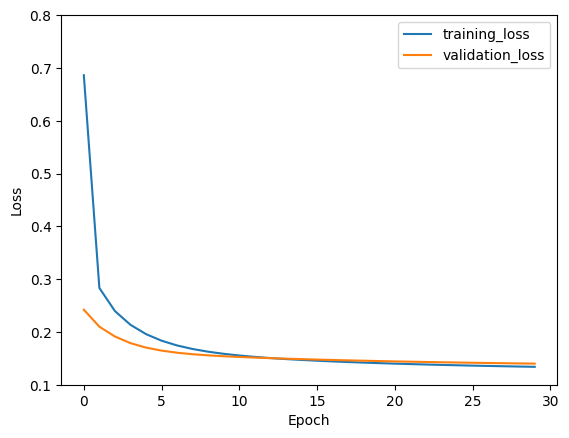

In [285]:

plot_learning_curve_loss(history, 0.1, 0.8)


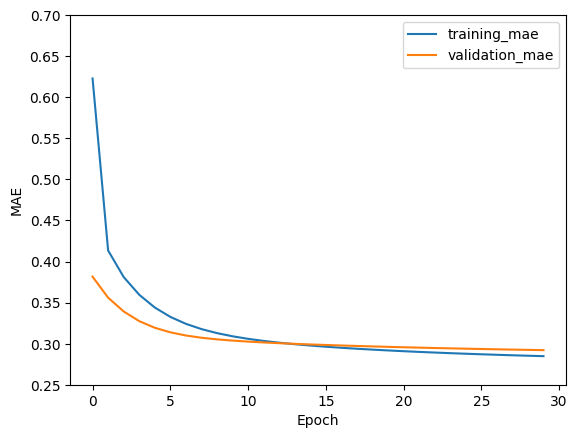

In [288]:

plot_learning_curve_metric(history, 0.25, 0.7)


In [ ]:

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      # tf.keras.layers.Conv1D(filters=32, kernel_size=5,
      #                 strides=1, padding="causal",
      #                 activation="relu",
      #                 input_shape=[None, 1]),
      # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

    model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-6, momentum=0.9),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

    model = model_build()  # Function to create your model
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=patience,
                                                mode='min')
    history = model.fit(train_series, epochs=13, callbacks=[early_stopping], validation_data=val_series, verbose=1) 


In [293]:

history.history


{'loss': [0.9628589749336243,
  0.7607203125953674,
  0.6216170787811279,
  0.5271725654602051,
  0.46258336305618286,
  0.41745832562446594,
  0.3850201368331909,
  0.3610023856163025,
  0.34271180629730225,
  0.32842010259628296,
  0.3169839680194855,
  0.30762597918510437,
  0.29980912804603577],
 'mean_absolute_error': [0.7773006558418274,
  0.6813722848892212,
  0.6097481846809387,
  0.5582801699638367,
  0.5216184258460999,
  0.4951675236225128,
  0.4756746292114258,
  0.46105822920799255,
  0.4498487412929535,
  0.44107934832572937,
  0.4340556263923645,
  0.42828062176704407,
  0.4234241843223572],
 'val_loss': [0.6109411120414734,
  0.48781871795654297,
  0.40761736035346985,
  0.3549672067165375,
  0.3195914924144745,
  0.29516535997390747,
  0.2778110206127167,
  0.26513317227363586,
  0.25563180446624756,
  0.24832548201084137,
  0.24256224930286407,
  0.23790034651756287,
  0.23403114080429077],
 'val_mean_absolute_error': [0.6178975701332092,
  0.5462729334831238,
  0.495

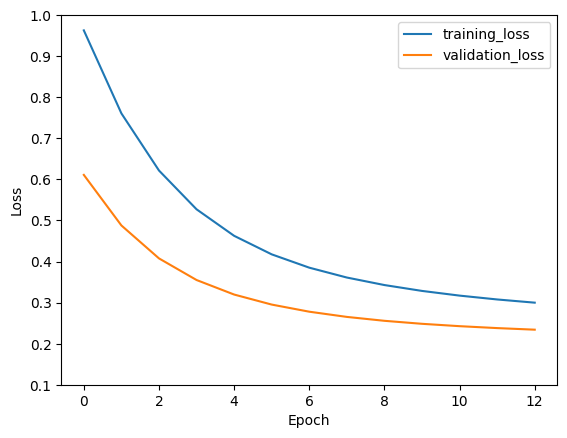

In [295]:

plot_learning_curve_loss(history, 0.1, 1)


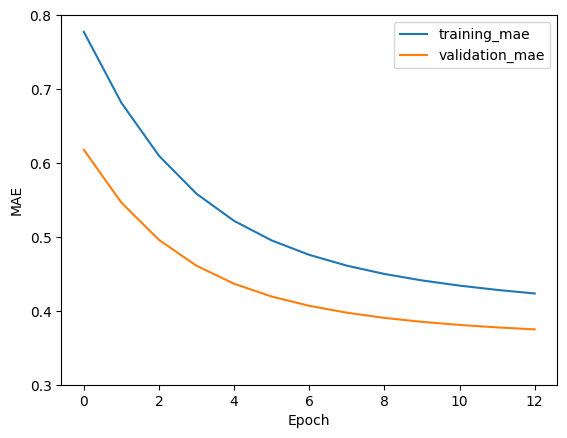

In [297]:

plot_learning_curve_metric(history, 0.3, 0.8)



## With the following setup

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      # tf.keras.layers.Conv1D(filters=32, kernel_size=5,
      #                 strides=1, padding="causal",
      #                 activation="relu",
      #                 input_shape=[None, 1]),
      # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
      # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.LSTM(64, return_sequences=True), 
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-6, momentum=0.9),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])
 

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                patience=patience,
                                                mode='min')
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("/Users/chidam_sp/jena_climate_model/jena_stacked_standard_LSTM.h5", monitor='val_loss', mode='min', save_best_only=True)
                   
history = model.fit(train_series, epochs=20, callbacks=[early_stopping, model_checkpoint], validation_data=val_series, verbose=1) 


In [307]:

history.history


{'loss': [0.834503173828125,
  0.7198636531829834,
  0.6351912021636963,
  0.5710169076919556,
  0.5212802886962891,
  0.48199203610420227,
  0.45045915246009827,
  0.424806147813797,
  0.4036863446235657,
  0.38611847162246704,
  0.37136489152908325,
  0.35885998606681824,
  0.34817183017730713,
  0.33896130323410034,
  0.3309616148471832,
  0.3239552080631256,
  0.3177679479122162,
  0.31226274371147156,
  0.30732592940330505,
  0.3028663694858551],
 'mean_absolute_error': [0.7275426983833313,
  0.6689007878303528,
  0.6233360171318054,
  0.587500274181366,
  0.5589401125907898,
  0.5358631014823914,
  0.5170292258262634,
  0.5014743804931641,
  0.48855510354042053,
  0.4777531921863556,
  0.4686388075351715,
  0.4608900249004364,
  0.4542481005191803,
  0.4485235810279846,
  0.44355493783950806,
  0.4391928017139435,
  0.43532437086105347,
  0.43186354637145996,
  0.4287382960319519,
  0.42589521408081055],
 'val_loss': [0.5981793403625488,
  0.5204584002494812,
  0.4631844758987427

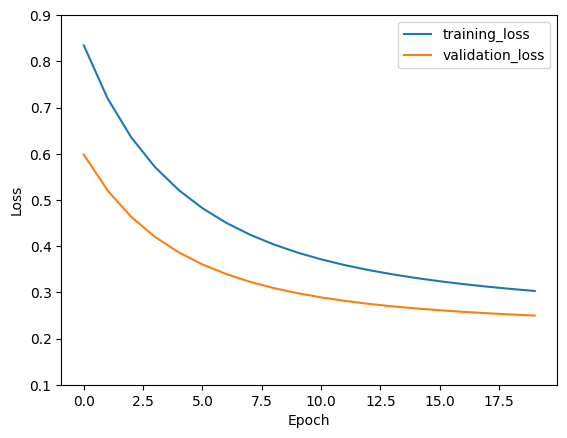

In [309]:

plot_learning_curve_loss(history, 0.1, 0.9)


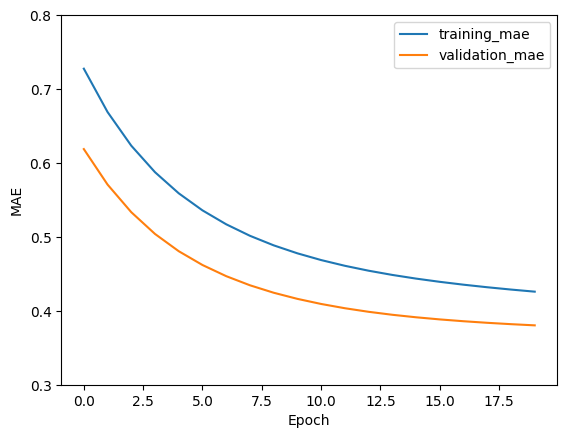

In [311]:

plot_learning_curve_metric(history, 0.3, 0.8)


In [ ]:

model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      # tf.keras.layers.Conv1D(filters=32, kernel_size=5,
      #                 strides=1, padding="causal",
      #                 activation="relu",
      #                 input_shape=[None, 1]),
      # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True)),
      # tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.LSTM(64, return_sequences=True), 
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-6, momentum=0.9),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

model = model_build()  # Function to create your model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=patience,
                                            mode='min')
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("/Users/chidam_sp/jena_climate_model/jena_stacked_standard_LSTM.h5", monitor='val_loss', mode='min', save_best_only=True)
                   
history = model.fit(train_series, epochs=40, callbacks=[early_stopping, model_checkpoint], validation_data=val_series, verbose=1) 


In [316]:


history.history


{'loss': [0.5431318283081055,
  0.49418240785598755,
  0.45794713497161865,
  0.43034738302230835,
  0.4087214171886444,
  0.3913702964782715,
  0.37717297673225403,
  0.3653598129749298,
  0.355385422706604,
  0.34685182571411133,
  0.33946096897125244,
  0.3329869508743286,
  0.3272556960582733,
  0.32212936878204346,
  0.31750160455703735,
  0.3132847249507904,
  0.3094107210636139,
  0.30582335591316223,
  0.30247926712036133,
  0.2993401288986206,
  0.29637789726257324,
  0.29356783628463745,
  0.29088926315307617,
  0.2883266508579254,
  0.2858654856681824,
  0.2834948003292084,
  0.2812051475048065,
  0.27898794412612915,
  0.2768373191356659,
  0.274746835231781,
  0.27271193265914917,
  0.27072834968566895,
  0.2687928080558777,
  0.2669024169445038,
  0.26505348086357117,
  0.26324462890625,
  0.26147353649139404,
  0.25973859429359436,
  0.25803783535957336,
  0.25636953115463257],
 'mean_absolute_error': [0.571564257144928,
  0.5443711876869202,
  0.5238097906112671,
  0.50

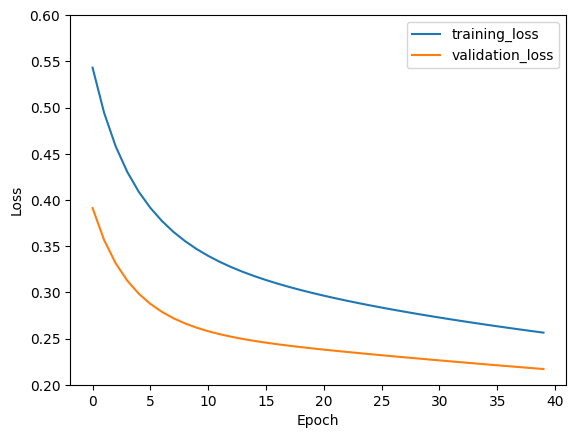

In [319]:

plot_learning_curve_loss(history, 0.2, 0.6)


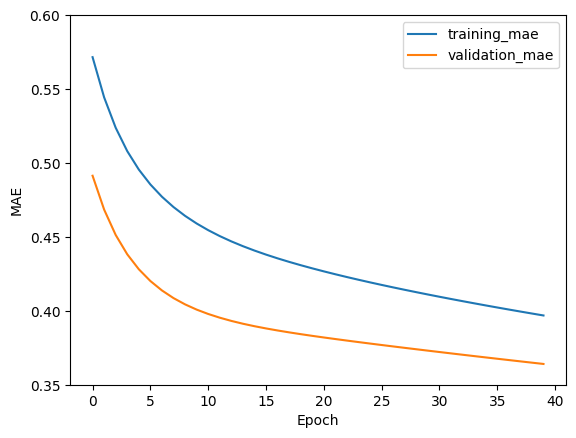

In [321]:

plot_learning_curve_metric(history, 0.35, 0.6)


In [ ]:

with the following setup


model = tf.keras.models.Sequential([
      tf.keras.Input(shape=(sequence_length, num_features-1)),
      tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
      tf.keras.layers.LSTM(16),
      tf.keras.layers.Dense(1)
    ])

model.compile(loss=tf.keras.losses.MeanSquaredError(),
                optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-5, momentum=0.9),
                metrics=[tf.keras.metrics.MeanAbsoluteError()])

model = model_build()  # Function to create your model
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=patience,
                                            mode='min')
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("/Users/chidam_sp/jena_climate_model/jena_stacked_standard_LSTM.h5", monitor='val_loss', mode='min', save_best_only=True)
                   
history = model.fit(train_series, epochs=15, callbacks=[early_stopping, model_checkpoint], validation_data=val_series, verbose=1) 



In [327]:

history.history


{'loss': [0.5734667181968689,
  0.36070331931114197,
  0.29567450284957886,
  0.26982033252716064,
  0.25428077578544617,
  0.2419133484363556,
  0.23108023405075073,
  0.22138075530529022,
  0.2126542031764984,
  0.2047877460718155,
  0.19768846035003662,
  0.19127994775772095,
  0.18549692630767822,
  0.18029046058654785,
  0.17561547458171844],
 'mean_absolute_error': [0.5922648310661316,
  0.4645290970802307,
  0.4230940341949463,
  0.4065631926059723,
  0.3956490457057953,
  0.38606712222099304,
  0.3771505057811737,
  0.36888813972473145,
  0.3612667918205261,
  0.35425469279289246,
  0.34782934188842773,
  0.34193792939186096,
  0.33653897047042847,
  0.3316243588924408,
  0.32716405391693115],
 'val_loss': [0.3360671401023865,
  0.25885745882987976,
  0.23740991950035095,
  0.2278708517551422,
  0.220290869474411,
  0.21304740011692047,
  0.2061997652053833,
  0.1998753547668457,
  0.19412167370319366,
  0.18891234695911407,
  0.18425145745277405,
  0.18004603683948517,
  0.176

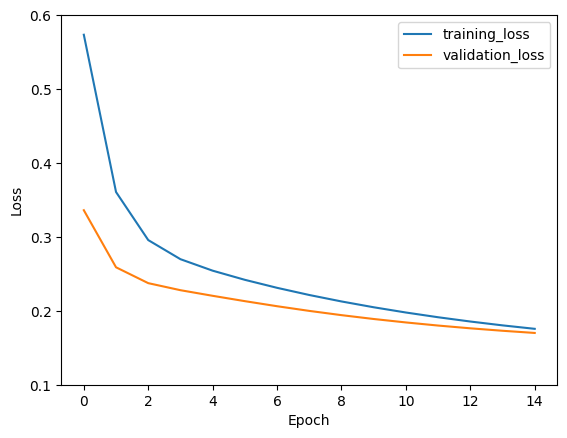

In [330]:

plot_learning_curve_loss(history, 0.1, 0.6)


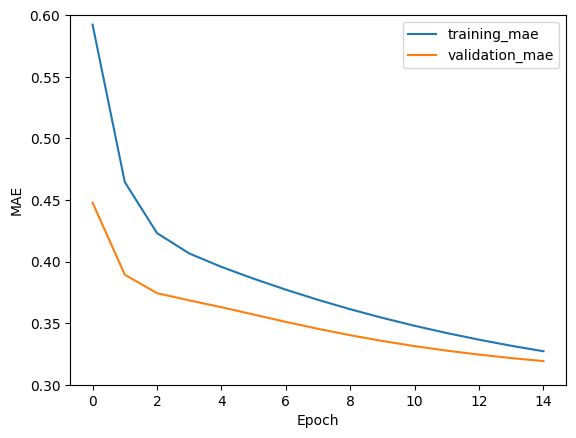

In [332]:

plot_learning_curve_metric(history, 0.3, 0.6)


In [16]:


best_model = keras.models.load_model("/Users/chidam_sp/jena_climate_model/jena_stacked_standard_LSTM.h5") 



2024-03-26 18:24:09.312365: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-03-26 18:24:09.312394: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-03-26 18:24:09.312404: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-03-26 18:24:09.312463: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-03-26 18:24:09.312688: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:

best_model


In [335]:

print(f"Test MAE: {best_model.evaluate(test)[1]:.2f}")


159/159 [==============================] - 5s 26ms/step - loss: 0.1466 - mean_absolute_error: 0.2994
Test MAE: 0.30


In [337]:

best_model.evaluate(test)


159/159 [==============================] - 4s 21ms/step - loss: 0.1466 - mean_absolute_error: 0.2994


[0.14661173522472382, 0.29938551783561707]

In [30]:

best_model.evaluate(test)


2024-03-26 18:28:44.983439: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 4s 21ms/step - loss: 0.1466 - mean_absolute_error: 0.2994


[0.146611750125885, 0.2993854582309723]

In [61]:

best_model.evaluate(test, batch_size=256)


159/159 [==============================] - 4s 23ms/step - loss: 0.1466 - mean_absolute_error: 0.2994


[0.1466117948293686, 0.2993854582309723]

In [63]:

len(test)


159

In [106]:

def get_test_data_predict(test):
    for test_f, test_l in test:
        return test_f, test_l


In [107]:

test_f, test_l = get_test_data_predict(test)


In [108]:


forecast1 = best_model.predict(test_f)



8/8 [==============================] - 1s 13ms/step


In [109]:

len(forecast1)


256


## Here I have used train_std["T (degC)"], train_mean["T (degC)"] because that's what I used to normalize the train, val, and the test data


In [114]:
# Here I have used train_std["T (degC)"], train_mean["T (degC)"] because that's what I used to normalize the train, val, and the test data

forecast_denormalized = forecast1 * 8.654241904226192 + 9.107596480798954
test_label_denormalized = test_l * 8.654241904226192 + 9.107596480798954



## Assuming the calculation to measure the difference between the actual test labels and predictions is accurate. 
## We see an approx 13 degree Celsius difference.


In [122]:

# Assuming the calculation to measure the difference between the actual test labels and predictions is accurate. 
# We see an approx 13 degree Celsius difference.

np.sum(np.abs(forecast_denormalized - test_label_denormalized))/42056


12.891523948939373

In [131]:

forecast_denormalized.shape, test_label_denormalized.shape


((256, 1), TensorShape([256]))

In [135]:

forecast_denormalized = tf.reshape(forecast_denormalized, [-1])
test_label_denormalized = tf.reshape(test_label_denormalized, [-1])


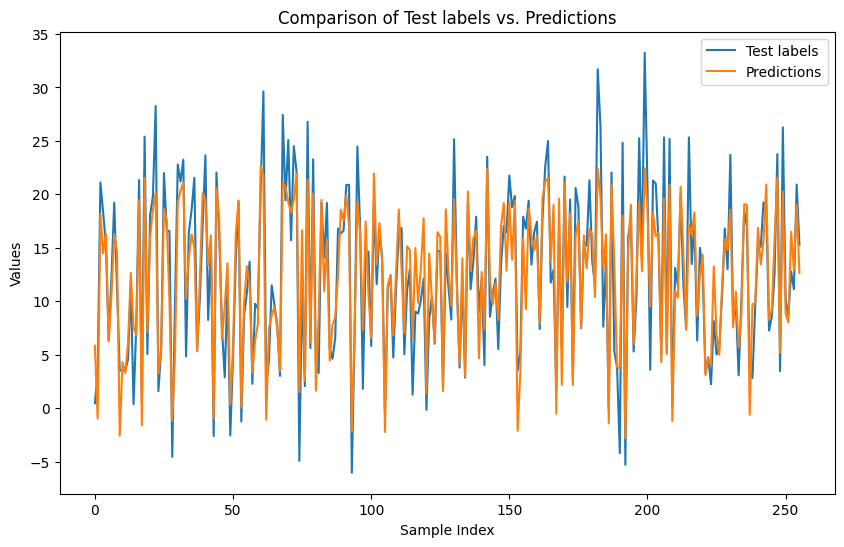

In [154]:


plt.figure(figsize=(10, 6))
# Assuming test_label_denormalized and forecast_denormalized are 1D arrays of the same length
plt.plot(test_label_denormalized, label='Test labels')
plt.plot(forecast_denormalized, label='Predictions')
plt.title('Comparison of Test labels vs. Predictions')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend(loc='upper right')




## Observations
From the above plot, it looks like the predictions are off in the crest compared to the troughs. 


In [ ]:

Assuming the degree conversion here is accurate the test MAE has achieved an approx 13 degree Celsius.


In [ ]:
#Let's calculate the baseline MAE

def evaluate_naive_method(dataset): 
    total_abs_err = 0
    samples_seen = 0
    for samples, targets in dataset:
        preds = samples[:, -1, 1] * std[1] + mean[1]
        total_abs_err += np.sum(np.abs(preds - targets))
        samples_seen += samples.shape[0]
    return total_abs_err / samples_seen




## This is unbelievable!


In [91]:

#This is unbelievable!

forecast


array([[ 0.740606  ],
       [ 0.14680906],
       [ 0.6373234 ],
       ...,
       [ 1.1957676 ],
       [-0.8274328 ],
       [ 1.32784   ]], dtype=float32)


## The length of prediciton I got when I used best_model.predict(test) instead of best_model.predict(test_f)


In [82]:

#The length of prediciton I got when I used best_model.predict(test) instead of best_model.predict(test_f)
len(forecast)


40484

In [12]:

df_processed = pd.read_csv('/Users/chidam_sp/jena_climate_processed_df_ready_for_train_val_test_split.csv')


In [14]:

n = len(df_processed)


In [351]:

train_std["T (degC)"], train_mean["T (degC)"]


(8.654241904226192, 9.107596480798954)